In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

Загружаем датасет

In [26]:
df = pd.read_csv('sales.csv')
df.head()

,SalePrice,GrLivArea,GarageArea,OverallQual,Street,SaleCondition
0,208500,1710,548,7,Pave,Normal
1,181500,1262,460,6,Pave,Normal
2,223500,1786,608,7,Pave,Normal
3,140000,1717,642,7,Pave,Abnorml
4,250000,2198,836,8,Pave,Normal


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   GrLivArea      1460 non-null   int64 
 2   GarageArea     1460 non-null   int64 
 3   OverallQual    1460 non-null   int64 
 4   Street         1460 non-null   object
 5   SaleCondition  1460 non-null   object
dtypes: int64(4), object(2)
memory usage: 68.6+ KB


In [28]:
df.duplicated().sum()

1

Находим один дубликат, пропусков нет. Работаем с данными дальше. Переводим категориальные признаки в количественные

In [29]:
LE = LabelEncoder()
df['Sale_cond_code'] = LE.fit_transform(df['SaleCondition'])
df['Street_code'] = LE.fit_transform(df['Street'])

Удаляем категориальные признаки

In [30]:
df = df.drop(['SaleCondition', 'Street'], axis=1)

In [31]:
df

,SalePrice,GrLivArea,GarageArea,OverallQual,Sale_cond_code,Street_code
0,208500,1710,548,7,4,1
1,181500,1262,460,6,4,1
2,223500,1786,608,7,4,1
3,140000,1717,642,7,0,1
4,250000,2198,836,8,4,1
...,...,...,...,...,...,...
1455,175000,1647,460,6,4,1
1456,210000,2073,500,6,4,1
1457,266500,2340,252,7,4,1
1458,142125,1078,240,5,4,1


Описываем характеристики признаков

In [32]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
SalePrice,1460.000000,180921.195890,79442.502883,34900.000000,129975.000000,163000.000000,214000.000000,755000.000000
GrLivArea,1460.000000,1515.463699,525.480383,334.000000,1129.500000,1464.000000,1776.750000,5642.000000
GarageArea,1460.000000,472.980137,213.804841,0.000000,334.500000,480.000000,576.000000,1418.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
Sale_cond_code,1460.000000,3.770548,1.100854,0.000000,4.000000,4.000000,4.000000,5.000000
Street_code,1460.000000,0.995890,0.063996,0.000000,1.000000,1.000000,1.000000,1.000000


Визуализируем распределения признаков

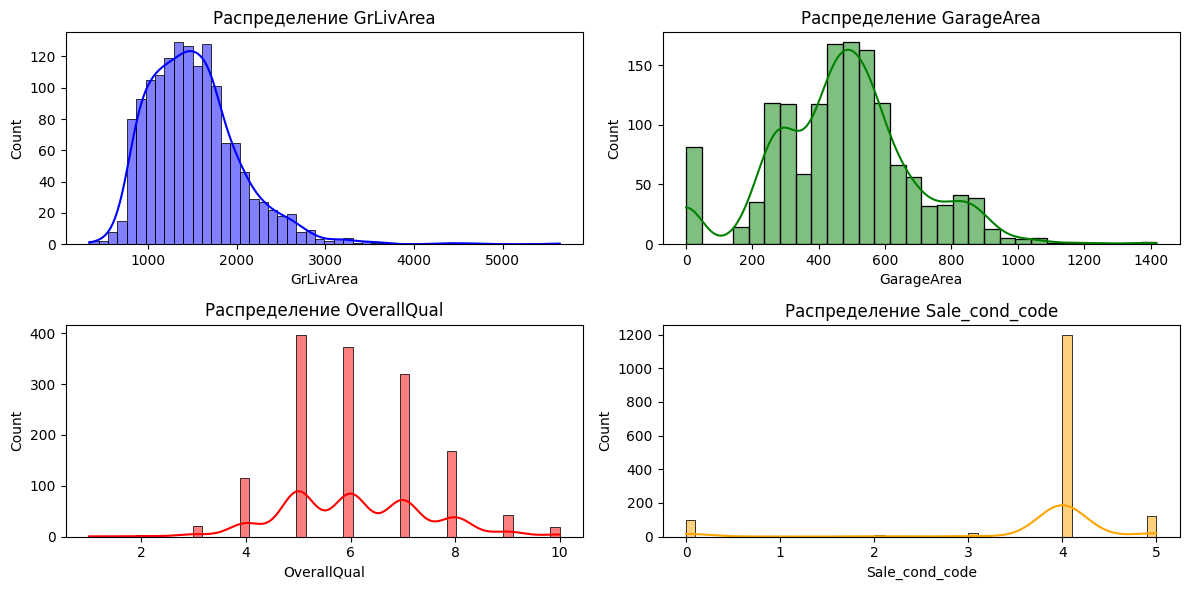

In [33]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['GrLivArea'], bins=50, kde=True, color='blue')
plt.title('Распределение GrLivArea')

plt.subplot(2, 2, 2)
sns.histplot(df['GarageArea'], bins=30, kde=True, color='green')
plt.title('Распределение GarageArea')

plt.subplot(2, 2, 3)
sns.histplot(df['OverallQual'], bins=50, kde=True, color='red')
plt.title('Распределение OverallQual')

plt.subplot(2, 2, 4)
sns.histplot(df['Sale_cond_code'], bins=50, kde=True, color='orange')
plt.title('Распределение Sale_cond_code')


plt.tight_layout()
plt.show()

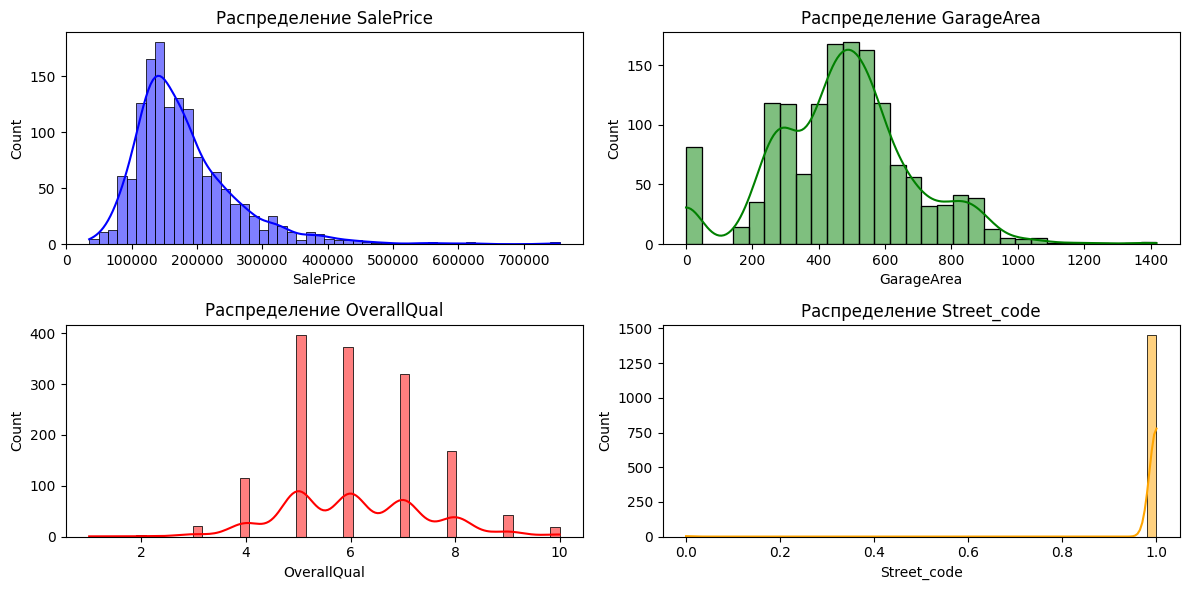

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['SalePrice'], bins=50, kde=True, color='blue')
plt.title('Распределение SalePrice')

plt.subplot(2, 2, 2)
sns.histplot(df['GarageArea'], bins=30, kde=True, color='green')
plt.title('Распределение GarageArea')

plt.subplot(2, 2, 3)
sns.histplot(df['OverallQual'], bins=50, kde=True, color='red')
plt.title('Распределение OverallQual')

plt.subplot(2, 2, 4)
sns.histplot(df['Street_code'], bins=50, kde=True, color='orange')
plt.title('Распределение Street_code')


plt.tight_layout()
plt.show()

Строим матрицу корреляций

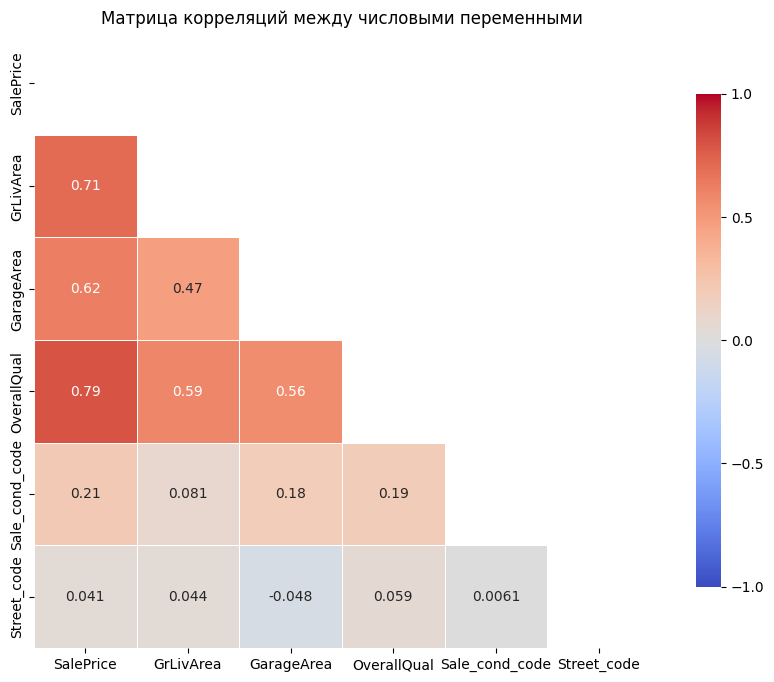

In [35]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 10},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

Делим датасет на обучающий и тестовый

In [36]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Строим модель линейной регресии по всем признакам**

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R² (все признаки): {r2:.4f}')
print(f'MSE (все признаки): {mse:.4f}')
print(f'MAE (все признаки): {mae:.4f}')

R² (все признаки): 0.7730
MSE (все признаки): 1583764987.1746
MAE (все признаки): 26439.0032


Получаем ошибки и коэффициент детерминации 0.773

**Строим модель линейной регресии по наиболее значимым признакам (GrLivArea, GarageArea, OverallQual)**

In [38]:
df = df.drop(['Sale_cond_code', 'Street_code'], axis=1)

In [39]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R² (значимые признаки): {r2:.4f}')
print(f'MSE (значимые признаки): {mse:.4f}')
print(f'MAE (значимые признаки): {mae:.4f}')

R² (значимые признаки): 0.7684
MSE (значимые признаки): 1616306234.4170
MAE (значимые признаки): 26592.4216


Ошибки и коэффициент детерминации не стали лучше

Строим 3D диаграмму - по осям откладывам 3 признака, используемые в модели, целевой параметр SalePrice отражаем градиентом цвета

In [41]:
from sklearn.decomposition import PCA
import plotly.express as px

In [42]:
fig = px.scatter_3d(df, x='GrLivArea', y='GarageArea', z='OverallQual',
              color='SalePrice')
fig.show()

Визуализация позволяем увидеть зависимость целевого параметра от признаков